In [20]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.max_columns', 50)

In [2]:
file_path = '/Users/lixiaohua/Documents/ClassIn Files/Data Scientist Project/Advanced Class/sales forecast data/Sales by Dishes & Customizations (With Category) 2023-2025.csv'
df = pd.read_csv(file_path)
df = df.drop(columns=['Unnamed: 0'])
df

FileNotFoundError: [Errno 2] No such file or directory: '/Users/lixiaohua/Documents/ClassIn Files/Data Scientist Project/Advanced Class/sales forecast data/Sales by Dishes & Customizations (With Category) 2023-2025.csv'

In [ ]:
df = df[df['Dishes & Customizations Breakdown'] != 'total sales']
df.shape

(122874, 7)

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day_name()
df

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day
0,2023-01-01,icy grass jelly signature,28,262.50,Dish,icy grass jelly signature,our signature series,Sunday
1,2023-01-01,taro paste,4,5.00,Customization,icy grass jelly signature,customization,Sunday
2,2023-01-01,caramel pudding (1 spoon),3,3.75,Customization,icy grass jelly signature,customization,Sunday
3,2023-01-01,grass jelly,3,2.25,Customization,icy grass jelly signature,customization,Sunday
4,2023-01-01,sesame rice ball (2pcs),2,2.50,Customization,icy grass jelly signature,customization,Sunday
...,...,...,...,...,...,...,...,...
123666,2025-03-13,less ice,1,0.00,Customization,grass jelly winter melon tea,customization,Thursday
123667,2025-03-13,oolong tea,1,4.25,Dish,oolong tea,teas,Thursday
123668,2025-03-13,0% sugar,1,0.00,Customization,oolong tea,customization,Thursday
123669,2025-03-13,normal ice,1,0.00,Customization,oolong tea,customization,Thursday


In [ ]:
dishes = df[df['Type'] == 'Dish'].copy()
dishes

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day
0,2023-01-01,icy grass jelly signature,28,262.50,Dish,icy grass jelly signature,our signature series,Sunday
15,2023-01-01,icy taro ball signature,7,62.00,Dish,icy taro ball signature,our signature series,Sunday
17,2023-01-01,hot red bean soup signature,7,59.50,Dish,hot red bean soup signature,our signature series,Sunday
18,2023-01-01,black sugar boba milky shaved ice,6,80.00,Dish,black sugar boba milky shaved ice,shaved ice,Sunday
23,2023-01-01,hot grass jelly soup signature,6,51.00,Dish,hot grass jelly soup signature,our signature series,Sunday
...,...,...,...,...,...,...,...,...
123657,2025-03-13,fresh milk oolong tea w. boba,1,6.25,Dish,fresh milk oolong tea w. boba,fresh milk,Thursday
123660,2025-03-13,grass jelly milk tea,1,5.75,Dish,grass jelly milk tea,milk teas,Thursday
123664,2025-03-13,grass jelly winter melon tea,1,5.75,Dish,grass jelly winter melon tea,winter melon teas,Thursday
123667,2025-03-13,oolong tea,1,4.25,Dish,oolong tea,teas,Thursday


In [ ]:
customizations = df[df['Type'] == 'Customization'].copy()
customizations.head(5)

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day
1,2023-01-01,taro paste,4,5.00,Customization,icy grass jelly signature,customization,Sunday
2,2023-01-01,caramel pudding (1 spoon),3,3.75,Customization,icy grass jelly signature,customization,Sunday
3,2023-01-01,grass jelly,3,2.25,Customization,icy grass jelly signature,customization,Sunday
4,2023-01-01,sesame rice ball (2pcs),2,2.50,Customization,icy grass jelly signature,customization,Sunday
5,2023-01-01,boba (1 spoon),2,1.50,Customization,icy grass jelly signature,customization,Sunday


In [ ]:
custom_sum = customizations.groupby(['Date', 'Associated Dish'])['Gross Sales'].sum().reset_index()
custom_sum = custom_sum.rename(columns={'Gross Sales': 'Customization Total'})
custom_sum.head(5)

,Date,Associated Dish,Customization Total
0,2023-01-01,black sugar boba fresh milk,1.25
1,2023-01-01,black sugar boba milk tea,0.75
2,2023-01-01,black sugar boba milky shaved ice,6.50
3,2023-01-01,black tea,0.00
4,2023-01-01,boba milk tea,0.75


In [ ]:
dishes = dishes.merge(custom_sum, how='left',
                      left_on=['Date', 'Dishes & Customizations Breakdown'],
                      right_on=['Date', 'Associated Dish'])
dishes

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish_x,Category,Day,Associated Dish_y,Customization Total
0,2023-01-01,icy grass jelly signature,28,262.50,Dish,icy grass jelly signature,our signature series,Sunday,icy grass jelly signature,24.5
1,2023-01-01,icy taro ball signature,7,62.00,Dish,icy taro ball signature,our signature series,Sunday,icy taro ball signature,2.5
2,2023-01-01,hot red bean soup signature,7,59.50,Dish,hot red bean soup signature,our signature series,Sunday,NaN,NaN
3,2023-01-01,black sugar boba milky shaved ice,6,80.00,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,black sugar boba milky shaved ice,6.5
4,2023-01-01,hot grass jelly soup signature,6,51.00,Dish,hot grass jelly soup signature,our signature series,Sunday,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
38325,2025-03-13,fresh milk oolong tea w. boba,1,6.25,Dish,fresh milk oolong tea w. boba,fresh milk,Thursday,fresh milk oolong tea w. boba,0.0
38326,2025-03-13,grass jelly milk tea,1,5.75,Dish,grass jelly milk tea,milk teas,Thursday,grass jelly milk tea,0.0
38327,2025-03-13,grass jelly winter melon tea,1,5.75,Dish,grass jelly winter melon tea,winter melon teas,Thursday,grass jelly winter melon tea,0.0
38328,2025-03-13,oolong tea,1,4.25,Dish,oolong tea,teas,Thursday,oolong tea,0.0


In [ ]:
dishes['Net Sales'] = dishes['Gross Sales'] - dishes['Customization Total'].fillna(0)
dishes

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish_x,Category,Day,Associated Dish_y,Customization Total,Net Sales
0,2023-01-01,icy grass jelly signature,28,262.50,Dish,icy grass jelly signature,our signature series,Sunday,icy grass jelly signature,24.5,238.00
1,2023-01-01,icy taro ball signature,7,62.00,Dish,icy taro ball signature,our signature series,Sunday,icy taro ball signature,2.5,59.50
2,2023-01-01,hot red bean soup signature,7,59.50,Dish,hot red bean soup signature,our signature series,Sunday,NaN,NaN,59.50
3,2023-01-01,black sugar boba milky shaved ice,6,80.00,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,black sugar boba milky shaved ice,6.5,73.50
4,2023-01-01,hot grass jelly soup signature,6,51.00,Dish,hot grass jelly soup signature,our signature series,Sunday,NaN,NaN,51.00
...,...,...,...,...,...,...,...,...,...,...,...
38325,2025-03-13,fresh milk oolong tea w. boba,1,6.25,Dish,fresh milk oolong tea w. boba,fresh milk,Thursday,fresh milk oolong tea w. boba,0.0,6.25
38326,2025-03-13,grass jelly milk tea,1,5.75,Dish,grass jelly milk tea,milk teas,Thursday,grass jelly milk tea,0.0,5.75
38327,2025-03-13,grass jelly winter melon tea,1,5.75,Dish,grass jelly winter melon tea,winter melon teas,Thursday,grass jelly winter melon tea,0.0,5.75
38328,2025-03-13,oolong tea,1,4.25,Dish,oolong tea,teas,Thursday,oolong tea,0.0,4.25


In [ ]:
dishes = dishes.drop(columns=['Associated Dish_y'])
dishes.head(5)

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish_x,Category,Day,Customization Total,Net Sales
0,2023-01-01,icy grass jelly signature,28,262.5,Dish,icy grass jelly signature,our signature series,Sunday,24.5,238.0
1,2023-01-01,icy taro ball signature,7,62.0,Dish,icy taro ball signature,our signature series,Sunday,2.5,59.5
2,2023-01-01,hot red bean soup signature,7,59.5,Dish,hot red bean soup signature,our signature series,Sunday,NaN,59.5
3,2023-01-01,black sugar boba milky shaved ice,6,80.0,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,6.5,73.5
4,2023-01-01,hot grass jelly soup signature,6,51.0,Dish,hot grass jelly soup signature,our signature series,Sunday,NaN,51.0


In [ ]:
dishes = dishes.rename(columns={'Associated Dish_x':'Associated Dish'})
dishes.head(5)

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales
0,2023-01-01,icy grass jelly signature,28,262.5,Dish,icy grass jelly signature,our signature series,Sunday,24.5,238.0
1,2023-01-01,icy taro ball signature,7,62.0,Dish,icy taro ball signature,our signature series,Sunday,2.5,59.5
2,2023-01-01,hot red bean soup signature,7,59.5,Dish,hot red bean soup signature,our signature series,Sunday,NaN,59.5
3,2023-01-01,black sugar boba milky shaved ice,6,80.0,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,6.5,73.5
4,2023-01-01,hot grass jelly soup signature,6,51.0,Dish,hot grass jelly soup signature,our signature series,Sunday,NaN,51.0


In [ ]:
df_concat = pd.concat([dishes, customizations])
df_concat

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales
0,2023-01-01,icy grass jelly signature,28,262.5,Dish,icy grass jelly signature,our signature series,Sunday,24.5,238.0
1,2023-01-01,icy taro ball signature,7,62.0,Dish,icy taro ball signature,our signature series,Sunday,2.5,59.5
2,2023-01-01,hot red bean soup signature,7,59.5,Dish,hot red bean soup signature,our signature series,Sunday,NaN,59.5
3,2023-01-01,black sugar boba milky shaved ice,6,80.0,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,6.5,73.5
4,2023-01-01,hot grass jelly soup signature,6,51.0,Dish,hot grass jelly soup signature,our signature series,Sunday,NaN,51.0
...,...,...,...,...,...,...,...,...,...,...
123663,2025-03-13,oolong tea,1,0.0,Customization,grass jelly milk tea,customization,Thursday,NaN,NaN
123665,2025-03-13,30% sugar,1,0.0,Customization,grass jelly winter melon tea,customization,Thursday,NaN,NaN
123666,2025-03-13,less ice,1,0.0,Customization,grass jelly winter melon tea,customization,Thursday,NaN,NaN
123668,2025-03-13,0% sugar,1,0.0,Customization,oolong tea,customization,Thursday,NaN,NaN


In [ ]:
df_concat['Net Sales'].fillna(df_concat['Gross Sales'], inplace=True)
df_concat['Customization Total'].fillna(df_concat['Gross Sales'], inplace=True)
df_concat

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales
0,2023-01-01,icy grass jelly signature,28,262.5,Dish,icy grass jelly signature,our signature series,Sunday,24.5,238.0
1,2023-01-01,icy taro ball signature,7,62.0,Dish,icy taro ball signature,our signature series,Sunday,2.5,59.5
2,2023-01-01,hot red bean soup signature,7,59.5,Dish,hot red bean soup signature,our signature series,Sunday,59.5,59.5
3,2023-01-01,black sugar boba milky shaved ice,6,80.0,Dish,black sugar boba milky shaved ice,shaved ice,Sunday,6.5,73.5
4,2023-01-01,hot grass jelly soup signature,6,51.0,Dish,hot grass jelly soup signature,our signature series,Sunday,51.0,51.0
...,...,...,...,...,...,...,...,...,...,...
123663,2025-03-13,oolong tea,1,0.0,Customization,grass jelly milk tea,customization,Thursday,0.0,0.0
123665,2025-03-13,30% sugar,1,0.0,Customization,grass jelly winter melon tea,customization,Thursday,0.0,0.0
123666,2025-03-13,less ice,1,0.0,Customization,grass jelly winter melon tea,customization,Thursday,0.0,0.0
123668,2025-03-13,0% sugar,1,0.0,Customization,oolong tea,customization,Thursday,0.0,0.0


In [ ]:
df_concat.sort_values(by=['Date','Associated Dish', 'Category'], inplace=True)
df_concat

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales
61,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00
62,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00
63,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25
64,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00
10,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00
...,...,...,...,...,...,...,...,...,...,...
38320,2025-03-13,traditional milk tea,1,7.50,Dish,traditional milk tea,milk teas,Thursday,2.50,5.00
123647,2025-03-13,black sugar boba (1 spoon),1,0.75,Customization,ube milk tea,customization,Thursday,0.75,0.75
123648,2025-03-13,50% sugar,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00
123649,2025-03-13,less ice,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00


In [ ]:
weather_24_25 = pd.read_excel('/Users/lixiaohua/Documents/ClassIn Files/Data Scientist Project/Advanced Class/sales forecast data/Plano, TX, United States 2024-01-01 to 2025-03-22.xlsx')
weather_24_25.tail(5)

,name,datetime,tempmax,tempmin,dif,temp,feelslikemax,feelslikemin,temp_feelslike,dif btw actual and feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
442,"Plano, TX, United States",2025-03-18,80.3,57.9,22.4,69.6,80.2,57.9,69.6,0.0,50.6,51.9,0.0,0,0.0,NaN,0.0,0.0,46.5,28.3,182.8,1010.4,23.0,9.9,96.8,8.3,6,10,2025-03-18T07:32:39,2025-03-18T19:37:19,0.65,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KTKI,D0360,KDAL,KF46"
443,"Plano, TX, United States",2025-03-19,69.0,49.5,19.5,61.6,69.0,44.8,61.4,0.2,35.4,40.2,0.0,0,0.0,NaN,0.0,0.0,43.1,25.8,287.5,1013.8,38.4,9.8,113.7,9.9,8,10,2025-03-19T07:31:20,2025-03-19T19:38:03,0.68,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KTKI,D0360,KDAL,KF46"
444,"Plano, TX, United States",2025-03-20,63.1,41.0,22.1,51.8,63.1,35.9,49.2,2.6,25.2,36.7,0.0,0,0.0,NaN,0.0,0.0,24.8,15.5,330.1,1025.8,3.7,9.9,101.7,8.6,8,10,2025-03-20T07:30:00,2025-03-20T19:38:47,0.71,Clear,Clear conditions throughout the day.,clear-day,"KTKI,D0360,KDAL,KF46"
445,"Plano, TX, United States",2025-03-21,74.9,43.6,31.3,57.6,74.9,38.4,55.9,1.7,30.7,37.5,0.0,0,0.0,NaN,0.0,0.0,30.3,20.8,181.0,1017.7,3.7,9.9,106.7,9.0,7,10,2025-03-21T07:28:41,2025-03-21T19:39:31,0.74,Clear,Clear conditions throughout the day.,clear-day,"KTKI,D0360,KDAL,KF46"
446,"Plano, TX, United States",2025-03-22,79.7,50.9,28.8,65.8,79.7,50.9,65.8,0.0,48.3,55.4,0.0,0,0.0,NaN,0.0,0.0,32.7,22.3,174.3,1013.9,5.4,9.9,105.1,9.2,6,10,2025-03-22T07:27:21,2025-03-22T19:40:15,0.75,Clear,Clear conditions throughout the day.,clear-day,"KTKI,D0360,KDAL,KF46"


In [ ]:
weather_23 = pd.read_csv('/Users/lixiaohua/Documents/ClassIn Files/Data Scientist Project/Advanced Class/sales forecast data/Plano, TX, United States 2023-01-01 to 2023-12-31.csv')
weather_23.head(5)

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,precip,precipprob,precipcover,preciptype,snow,snowdepth,windgust,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"Plano, TX, United States",2023-01-01,74.8,52.9,63.3,74.8,52.9,63.3,50.3,64.0,0.000,0,0.0,NaN,0,0.0,24.2,13.8,174.5,1010.7,26.1,9.9,56.0,4.8,3,NaN,2023-01-01T07:29:58,2023-01-01T17:30:58,0.32,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KTKI,D0360,KDAL,72254153914,72104400448,722580..."
1,"Plano, TX, United States",2023-01-02,75.1,62.6,68.7,75.1,62.6,68.7,64.4,86.5,0.028,100,12.5,rain,0,0.0,27.1,15.9,171.5,1007.4,79.8,7.6,24.2,2.1,2,NaN,2023-01-02T07:30:09,2023-01-02T17:31:43,0.36,"Rain, Partially cloudy",Partly cloudy throughout the day with afternoo...,rain,"KTKI,D0360,KDAL,72254153914,72104400448,722580..."
2,"Plano, TX, United States",2023-01-03,67.0,49.9,60.7,67.0,48.8,60.6,33.5,37.0,0.000,0,0.0,NaN,0,0.0,25.3,12.8,271.7,1009.9,45.6,9.9,44.2,3.7,2,NaN,2023-01-03T07:30:19,2023-01-03T17:32:29,0.39,Partially cloudy,Clearing in the afternoon.,partly-cloudy-day,"KTKI,D0360,KDAL,72254153914,72104400448,722580..."
3,"Plano, TX, United States",2023-01-04,57.0,37.3,46.6,57.0,34.3,45.8,32.2,59.2,0.000,0,0.0,NaN,0,0.0,12.1,8.8,336.3,1017.6,7.8,9.9,50.9,4.3,5,NaN,2023-01-04T07:30:28,2023-01-04T17:33:16,0.42,Clear,Clear conditions throughout the day.,clear-day,"KTKI,D0360,KDAL,72254153914,72104400448,722580..."
4,"Plano, TX, United States",2023-01-05,60.9,36.0,46.5,60.9,32.2,45.8,28.6,54.6,0.000,0,0.0,NaN,0,0.0,12.5,6.7,328.6,1025.1,9.4,9.9,54.7,4.7,4,NaN,2023-01-05T07:30:34,2023-01-05T17:34:04,0.46,Clear,Clear conditions throughout the day.,clear-day,"KTKI,D0360,KDAL,72254153914,72104400448,722580..."


In [ ]:
weather_24_25 = weather_24_25.rename(columns={'feelslike':'temp_feelslike','datetime':'Date'})
weather_24_25_keep = weather_24_25[['Date','temp_feelslike']]
weather_24_25_keep

,Date,temp_feelslike
0,2024-01-01,33.6
1,2024-01-02,36.7
2,2024-01-03,44.2
3,2024-01-04,45.9
4,2024-01-05,42.8
...,...,...
442,2025-03-18,69.6
443,2025-03-19,61.4
444,2025-03-20,49.2
445,2025-03-21,55.9


In [ ]:
weather_23 = weather_23.rename(columns={'feelslike':'temp_feelslike','datetime':'Date'})
weather_23_keep = weather_23[['Date','temp_feelslike']]
weather_23_keep

,Date,temp_feelslike
0,2023-01-01,63.3
1,2023-01-02,68.7
2,2023-01-03,60.6
3,2023-01-04,45.8
4,2023-01-05,45.8
...,...,...
360,2023-12-27,39.0
361,2023-12-28,35.4
362,2023-12-29,38.4
363,2023-12-30,46.2


In [ ]:
weather = pd.concat([weather_23_keep, weather_24_25_keep], axis=0)
weather

,Date,temp_feelslike
0,2023-01-01,63.3
1,2023-01-02,68.7
2,2023-01-03,60.6
3,2023-01-04,45.8
4,2023-01-05,45.8
...,...,...
442,2025-03-18,69.6
443,2025-03-19,61.4
444,2025-03-20,49.2
445,2025-03-21,55.9


In [ ]:
weather = weather.copy()
weather['Date'] = pd.to_datetime(weather['Date'])

In [ ]:
df_concat = df_concat.merge(weather, on='Date', how='left')
df_concat

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales,temp_feelslike
0,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3
1,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3
2,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25,63.3
3,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3
4,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00,63.3
...,...,...,...,...,...,...,...,...,...,...,...
122869,2025-03-13,traditional milk tea,1,7.50,Dish,traditional milk tea,milk teas,Thursday,2.50,5.00,67.6
122870,2025-03-13,black sugar boba (1 spoon),1,0.75,Customization,ube milk tea,customization,Thursday,0.75,0.75,67.6
122871,2025-03-13,50% sugar,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6
122872,2025-03-13,less ice,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6


In [ ]:
df_concat.to_excel('df_concat.xlsx')

In [ ]:
df_date_size = df_concat.groupby('Date').size()
df_date_size

Date
2023-01-01    266
2023-01-02    218
2023-01-03    118
2023-01-04     95
2023-01-05    155
             ... 
2025-03-09    199
2025-03-10    121
2025-03-11    137
2025-03-12    118
2025-03-13    122
Length: 798, dtype: int64

In [ ]:
holiday = pd.read_excel('/Users/lixiaohua/Documents/ClassIn Files/Data Scientist Project/Advanced Class/sales forecast data/Plano, TX, United States 2024-01-01 to 2025-03-22.xlsx', sheet_name='holiday-adjusted')
holiday

,Date,Day,Holiday,is_holiday,Unnamed: 4
0,2023-01-01,Monday,New Year's Day,y,Federal Holiday
1,2023-01-16,Sunday,Martin Luther King Jr. Day,y,Federal Holiday
2,2023-01-22,Wednesday,Lunar New Year,y,Observance
3,2023-02-12,Tuesday,Super Bowl,y,Sporting Event
4,2023-02-14,Monday,Valentine's Day,y,Observance
...,...,...,...,...,...
61,2025-06-15,Sunday,Father's Day,y,Observance
62,2025-07-04,Friday,Independence Day,y,Federal Holiday
63,2025-09-01,Monday,Labor Day,y,NaN
64,2025-10-13,Monday,Columbus Day,y,NaN


In [ ]:
holiday = holiday[['Date','Holiday','is_holiday']]
holiday

,Date,Holiday,is_holiday
0,2023-01-01,New Year's Day,y
1,2023-01-16,Martin Luther King Jr. Day,y
2,2023-01-22,Lunar New Year,y
3,2023-02-12,Super Bowl,y
4,2023-02-14,Valentine's Day,y
...,...,...,...
61,2025-06-15,Father's Day,y
62,2025-07-04,Independence Day,y
63,2025-09-01,Labor Day,y
64,2025-10-13,Columbus Day,y


In [ ]:
holiday = holiday.copy()
holiday['Date'] = pd.to_datetime(holiday['Date'])

In [ ]:
df_full = df_concat.merge(holiday, on='Date', how='left')
df_full

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales,temp_feelslike,Holiday,is_holiday
0,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
1,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
2,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25,63.3,New Year's Day,y
3,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
4,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00,63.3,New Year's Day,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122869,2025-03-13,traditional milk tea,1,7.50,Dish,traditional milk tea,milk teas,Thursday,2.50,5.00,67.6,NaN,NaN
122870,2025-03-13,black sugar boba (1 spoon),1,0.75,Customization,ube milk tea,customization,Thursday,0.75,0.75,67.6,NaN,NaN
122871,2025-03-13,50% sugar,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6,NaN,NaN
122872,2025-03-13,less ice,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6,NaN,NaN


In [ ]:
df_full['is_holiday'] = df_full['is_holiday'].fillna('n')
df_full

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales,temp_feelslike,Holiday,is_holiday
0,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
1,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
2,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25,63.3,New Year's Day,y
3,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
4,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00,63.3,New Year's Day,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122869,2025-03-13,traditional milk tea,1,7.50,Dish,traditional milk tea,milk teas,Thursday,2.50,5.00,67.6,NaN,n
122870,2025-03-13,black sugar boba (1 spoon),1,0.75,Customization,ube milk tea,customization,Thursday,0.75,0.75,67.6,NaN,n
122871,2025-03-13,50% sugar,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6,NaN,n
122872,2025-03-13,less ice,1,0.00,Customization,ube milk tea,customization,Thursday,0.00,0.00,67.6,NaN,n


In [ ]:
df_full.to_excel('df_full.xlsx')

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
file_path = "/content/drive/My Drive/df_full.xlsx"
df = pd.read_excel(file_path)
df.head(5)

,Unnamed: 0,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales,temp_feelslike,Holiday,is_holiday
0,0,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
1,1,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
2,2,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25,63.3,New Year's Day,y
3,3,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,y
4,4,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00,63.3,New Year's Day,y


In [37]:
df = df.drop(columns=[col for col in df.columns if 'Unnamed' in col], errors='ignore')
df.head(5)

,Date,Dishes & Customizations Breakdown,Count,Gross Sales,Type,Associated Dish,Category,Day,Customization Total,Net Sales,temp_feelslike,Holiday,is_holiday,is_weekend
0,2023-01-01,less ice,4,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,True,True
1,2023-01-01,50% sugar,3,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,True,True
2,2023-01-01,almond pudding (1pcs),1,1.25,Customization,black sugar boba fresh milk,customization,Sunday,1.25,1.25,63.3,New Year's Day,True,True
3,2023-01-01,100% sugar,1,0.00,Customization,black sugar boba fresh milk,customization,Sunday,0.00,0.00,63.3,New Year's Day,True,True
4,2023-01-01,black sugar boba fresh milk,4,28.25,Dish,black sugar boba fresh milk,fresh milk,Sunday,1.25,27.00,63.3,New Year's Day,True,True


# **Sales Performance Analysis by Day Type with Weekday**

In [50]:
df['is_holiday'] = df['Holiday'].notna()
df['is_weekend'] = df['Day'].str.lower().isin(['saturday', 'sunday'])

In [51]:
df_dish = df[df['Type'] == 'Dish'].copy()

df_dish['Day Type'] = df_dish.apply(
    lambda row: (
        'Weekend + Holiday' if row['is_weekend'] and row['is_holiday']
        else 'Holiday Only' if row['is_holiday']
        else 'Weekend Only' if row['is_weekend']
        else 'Weekday (Normal)'
    ), axis=1
)

In [53]:
daily_summary = df_dish.groupby(['Date', 'Day Type'])[['Count', 'Gross Sales']].sum().reset_index()
summary_by_type = (
    daily_summary.groupby('Day Type')[['Count', 'Gross Sales']]
    .mean().round(2)
    .reindex(['Weekday (Normal)', 'Holiday Only', 'Weekend Only', 'Weekend + Holiday'])
)

In [54]:
baseline = summary_by_type.loc['Weekday (Normal)']
summary_by_type['Count Growth %'] = ((summary_by_type['Count'] - baseline['Count']) / baseline['Count'] * 100).round(1)
summary_by_type['Sales Growth %'] = ((summary_by_type['Gross Sales'] - baseline['Gross Sales']) / baseline['Gross Sales'] * 100).round(1)

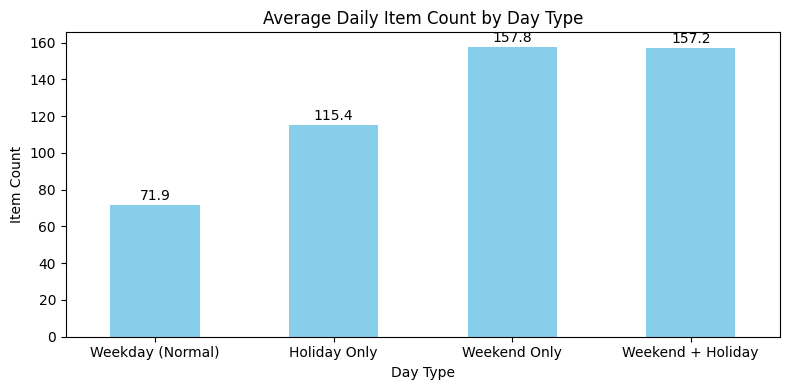

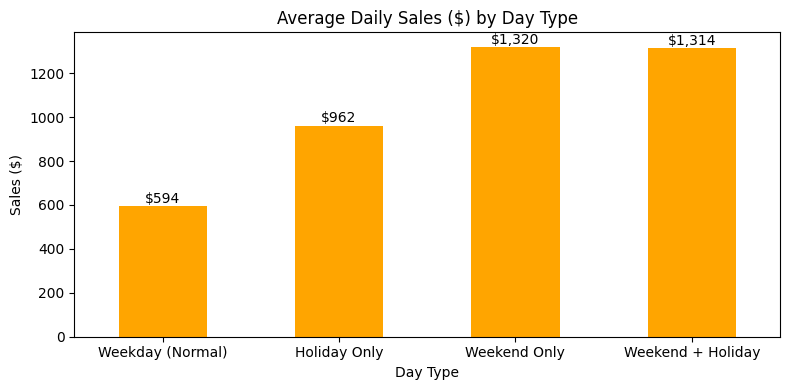

In [56]:
for col, color, ylabel in zip(['Count', 'Gross Sales'], ['skyblue', 'orange'], ['Item Count', 'Sales ($)']):
    plt.figure(figsize=(8, 4))
    ax = summary_by_type[col].plot(kind='bar', color=color)
    ax.set_title(f'Average Daily {ylabel} by Day Type')
    ax.set_ylabel(ylabel)
    ax.set_xticklabels(summary_by_type.index, rotation=0)
    for i, val in enumerate(summary_by_type[col]):
        label = f'{val:.1f}' if col == 'Count' else f'${val:,.0f}'
        ax.text(i, val + 1, label, ha='center', va='bottom')
    plt.tight_layout()
    plt.show()

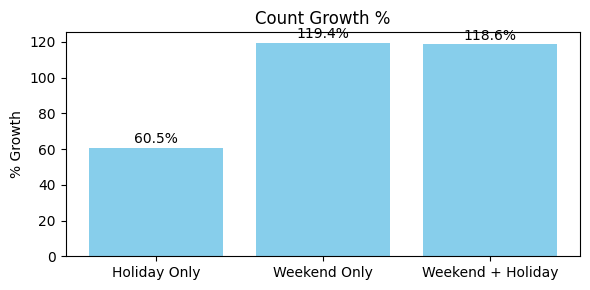

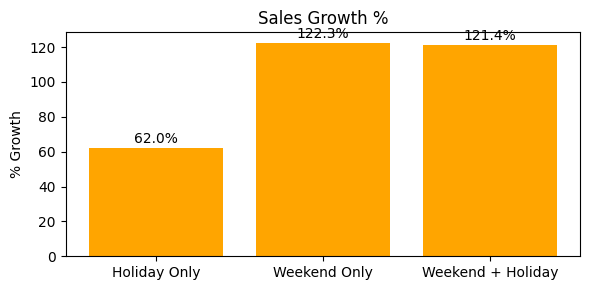

In [57]:
growth_df = summary_by_type.drop(index='Weekday (Normal)')

for col, color in zip(['Count Growth %', 'Sales Growth %'], ['skyblue', 'orange']):
    plt.figure(figsize=(6, 3))
    bars = plt.bar(growth_df.index, growth_df[col], color=color)
    plt.title(col)
    plt.ylabel('% Growth')
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{height:.1f}%', ha='center', va='bottom')
    plt.tight_layout()
    plt.show()


# **Top 10 Dishes by Day Type and Exclusive Day-Type Bestsellers**

In [58]:
weekday_avg = df_dish[df_dish['Day Type'] == 'Weekday (Normal)'].groupby('Dishes & Customizations Breakdown')['Count'].mean()

dish_rank = df_dish.groupby(['Day Type', 'Dishes & Customizations Breakdown'])['Count'].mean().reset_index()
top10_daytype = dish_rank.sort_values(['Day Type', 'Count'], ascending=[True, False]).groupby('Day Type').head(10)

plot_daytypes = top10_daytype[top10_daytype['Day Type'] != 'Weekday (Normal)'].copy()
day_types = plot_daytypes['Day Type'].unique()

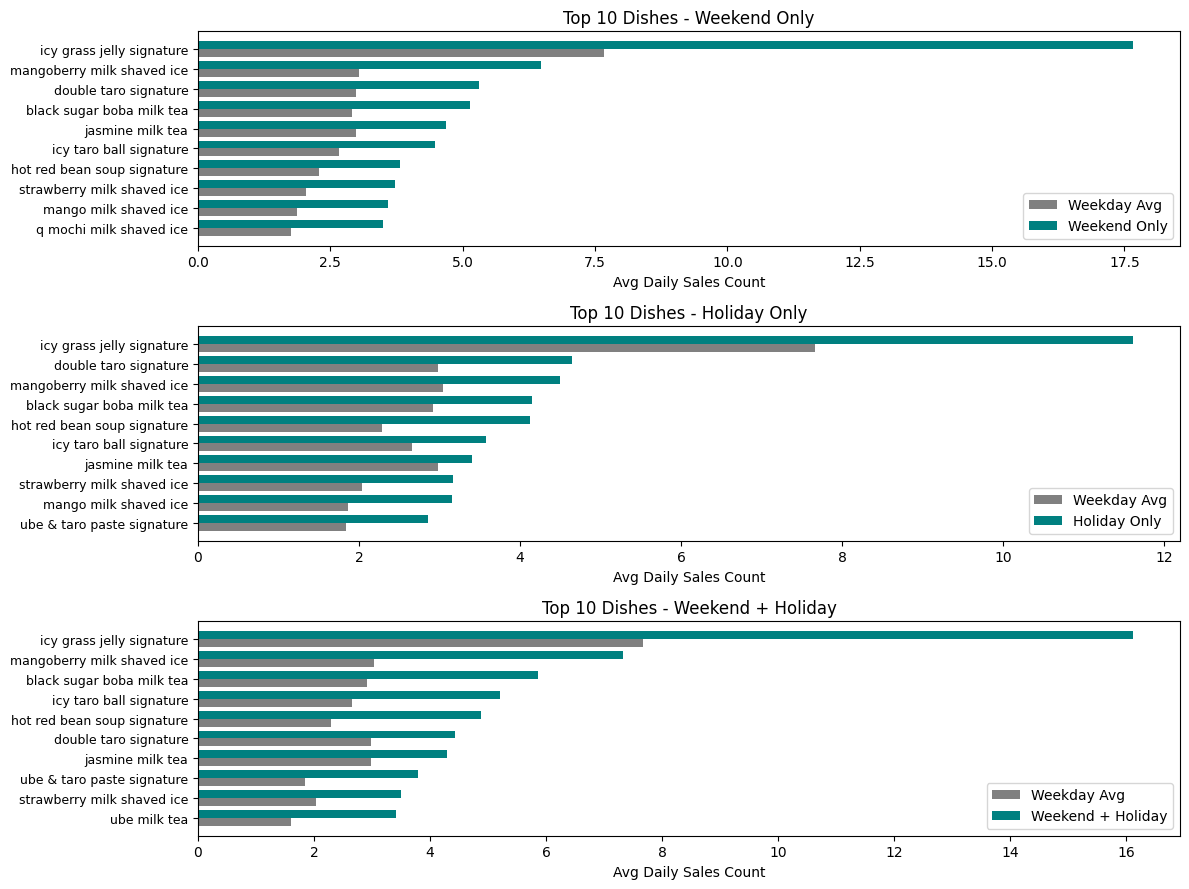

In [59]:
day_types_order = ['Weekend Only', 'Holiday Only', 'Weekend + Holiday']
plot_daytypes['Day Type'] = pd.Categorical(plot_daytypes['Day Type'], categories=day_types_order, ordered=True)
plot_daytypes = plot_daytypes.sort_values(['Day Type', 'Count'], ascending=[True, False])

fig, axes = plt.subplots(len(day_types_order), figsize=(12, 3 * len(day_types_order)))
if isinstance(axes, plt.Axes): axes = [axes]

for i, dtype in enumerate(day_types_order):
    group = plot_daytypes[plot_daytypes['Day Type'] == dtype].sort_values('Count')
    y_pos = np.arange(len(group))
    labels = group['Dishes & Customizations Breakdown']
    current_vals = group['Count']
    weekday_vals = labels.map(weekday_avg).fillna(0)

    ax = axes[i]
    ax.barh(y_pos - 0.2, weekday_vals, height=0.4, color='gray', label='Weekday Avg')
    ax.barh(y_pos + 0.2, current_vals, height=0.4, color='teal', label=dtype)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_title(f"Top 10 Dishes - {dtype}")
    ax.set_xlabel("Avg Daily Sales Count")
    ax.legend()

plt.tight_layout()
plt.show()

# **Daily Sales Heatmap of Top 10 Holidays by Dish Count**

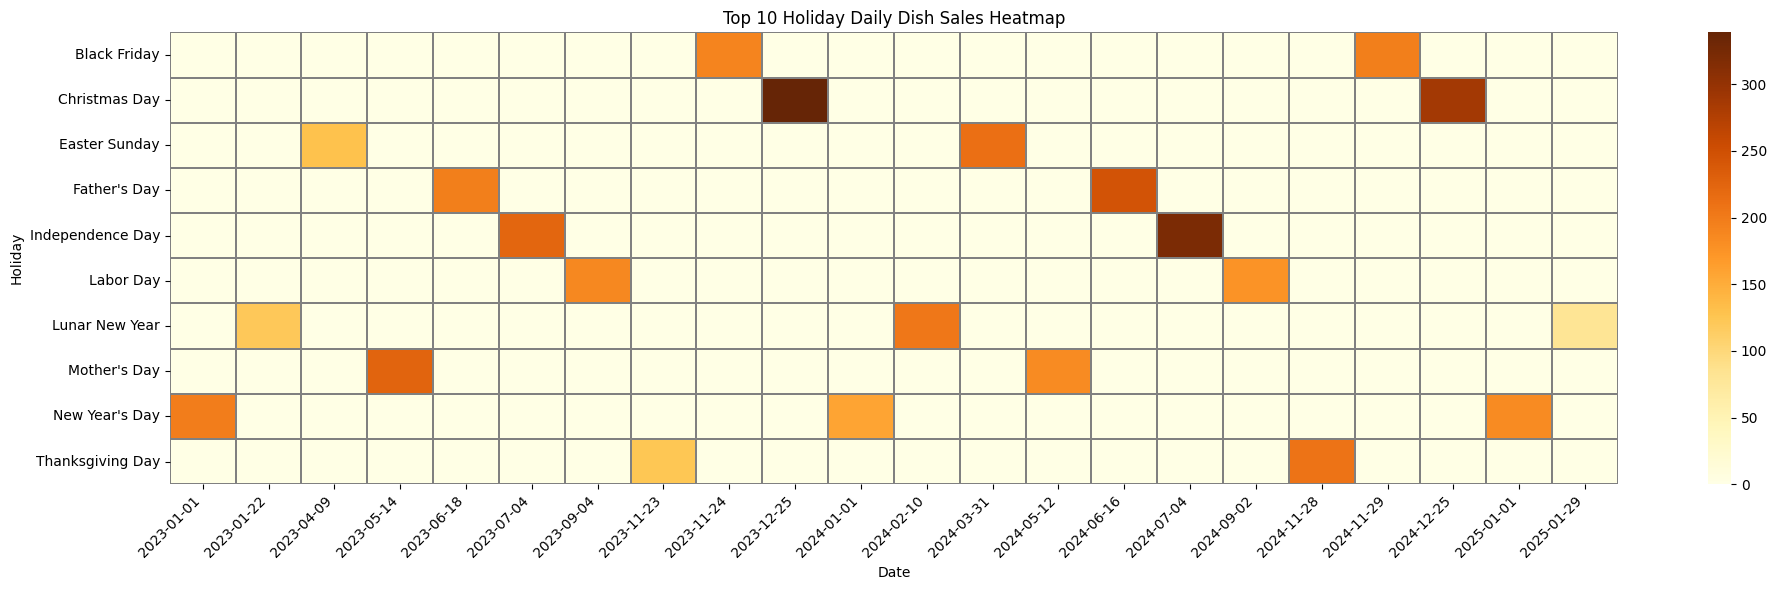

In [60]:
daily_holiday_sales = df_dish.groupby(['Holiday', 'Date'])['Count'].sum().reset_index()

top10_holidays = (
    daily_holiday_sales.groupby('Holiday')['Count']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .index
)

daily_holiday_sales_top10 = daily_holiday_sales[daily_holiday_sales['Holiday'].isin(top10_holidays)]

heatmap_data = daily_holiday_sales_top10.pivot(index='Holiday', columns='Date', values='Count').fillna(0)
heatmap_data.columns = heatmap_data.columns.strftime('%Y-%m-%d')

plt.figure(figsize=(20, 6))
sns.heatmap(heatmap_data, cmap='YlOrBr', linewidths=0.3, linecolor='gray')

plt.title("Top 10 Holiday Daily Dish Sales Heatmap")
plt.xlabel("Date")
plt.ylabel("Holiday")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **Top-Selling Dishes Across the 5 Most Popular Holidays**

In [61]:
top_5_holidays = df_dish[df_dish['Holiday'].notnull()].groupby('Holiday')['Count'].sum().nlargest(5).index.tolist()

top_dishes = df_dish[df_dish['Holiday'].isin(top_5_holidays)].groupby(['Holiday', 'Dishes & Customizations Breakdown'])['Count'].mean().reset_index().sort_values(['Holiday', 'Count'], ascending=[True, False])     .groupby('Holiday').head(5)

weekday_baseline = df_dish[(df_dish['Holiday'].isnull()) & (~df_dish['is_weekend'])].groupby('Dishes & Customizations Breakdown')['Count'].mean().reset_index().rename(columns={'Count': 'Weekday Avg Count'})

compare_df = top_dishes.merge(weekday_baseline, on='Dishes & Customizations Breakdown', how='left')
compare_df['Growth %'] = (
    (compare_df['Count'] - compare_df['Weekday Avg Count']) /
    compare_df['Weekday Avg Count'].replace(0, np.nan) * 100
).round(1)

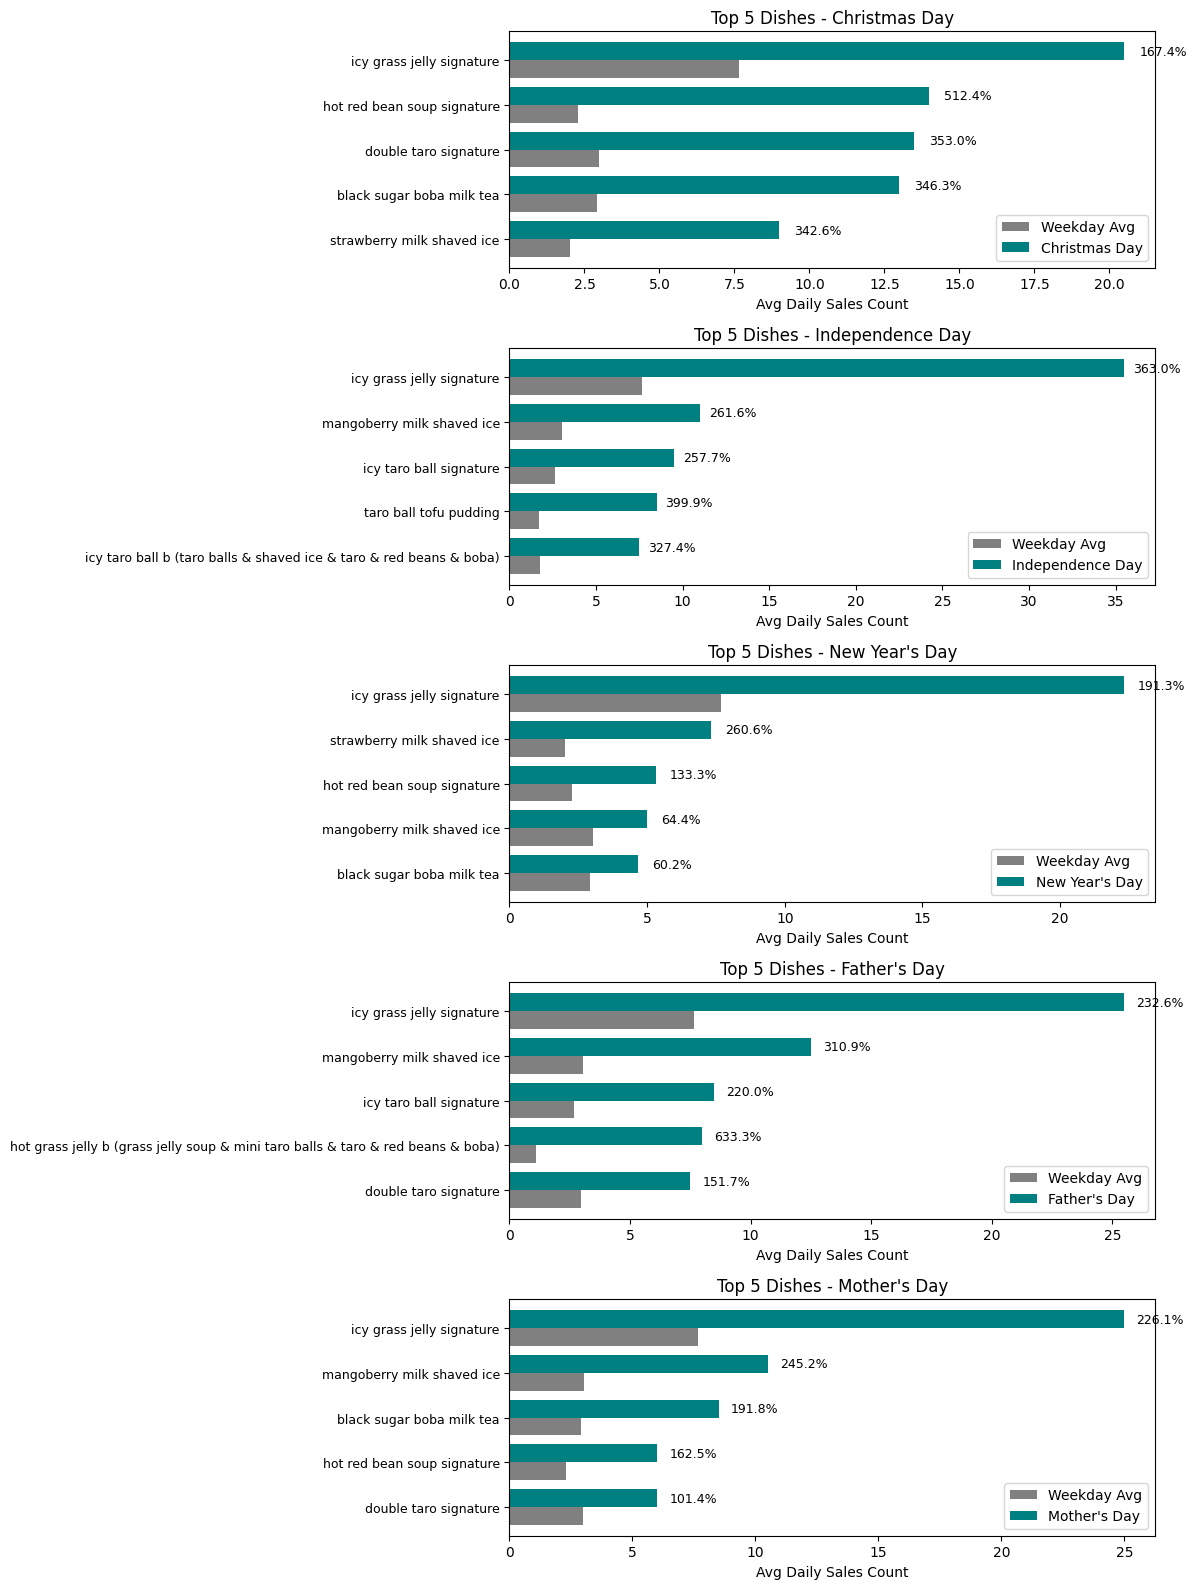

In [62]:
fig, axes = plt.subplots(len(top_5_holidays), figsize=(12, 3.2 * len(top_5_holidays)))
if isinstance(axes, plt.Axes): axes = [axes]

for i, holiday in enumerate(top_5_holidays):
    sub = compare_df[compare_df['Holiday'] == holiday].sort_values('Count')
    y = np.arange(len(sub))
    labels = sub['Dishes & Customizations Breakdown']
    holiday_vals = sub['Count']
    weekday_vals = sub['Weekday Avg Count']
    growth_vals = sub['Growth %']

    ax = axes[i]
    ax.barh(y - 0.2, weekday_vals, height=0.4, color='gray', label='Weekday Avg')
    ax.barh(y + 0.2, holiday_vals, height=0.4, color='teal', label=holiday)
    for j, val in enumerate(holiday_vals):
        ax.text(val + 0.5, y[j] + 0.2, f'{growth_vals.iloc[j]:.1f}%', va='center', fontsize=9)
    ax.set_yticks(y)
    ax.set_yticklabels(labels, fontsize=9)
    ax.set_title(f"Top 5 Dishes - {holiday}")
    ax.set_xlabel("Avg Daily Sales Count")
    ax.legend()

plt.tight_layout()
plt.show()